In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2 as cv
import random

# Oxford-IIIT Pet Dataset - Data Analysis

In [2]:
data_path = 'C:/Studia/8 semestr/DL/Data/Oxford-pets'

## DataFrame

In [3]:
data = []
with open(f'{data_path}/annotations/list.txt', 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i < 6:
            continue
        line = line[:-1].split(' ')
        line[1:] = list(map(int, line[1:]))
        data.append(line)
data.sort(key=lambda e: e[0].lower())

In [4]:
df = pd.DataFrame(data, columns=['Image', 'CLASS-ID', 'SPECIES-ID', 'BREED-ID'])
df.insert(4, 'SPECIES-NAME',
          ['Cat' if v else 'Dog' for v in df['SPECIES-ID'] == 1], True)
class_names = [
    'Abyssinian', 'american_bulldog', 'american_pit_bull_terrier',
    'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer',
    'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel',
    'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese',
    'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon',
    'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug',
    'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier',
    'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier',
    'wheaten_terrier', 'yorkshire_terrier'
]
df.insert(2, 'CLASS-NAME', [class_names[v - 1] for v in df['CLASS-ID']], True)

df.head()

Image  CLASS-ID  CLASS-NAME  SPECIES-ID  BREED-ID SPECIES-NAME
0    Abyssinian_1         1  Abyssinian           1         1          Cat
1   Abyssinian_10         1  Abyssinian           1         1          Cat
2  Abyssinian_100         1  Abyssinian           1         1          Cat
3  Abyssinian_101         1  Abyssinian           1         1          Cat
4  Abyssinian_102         1  Abyssinian           1         1          Cat

## Class distribution

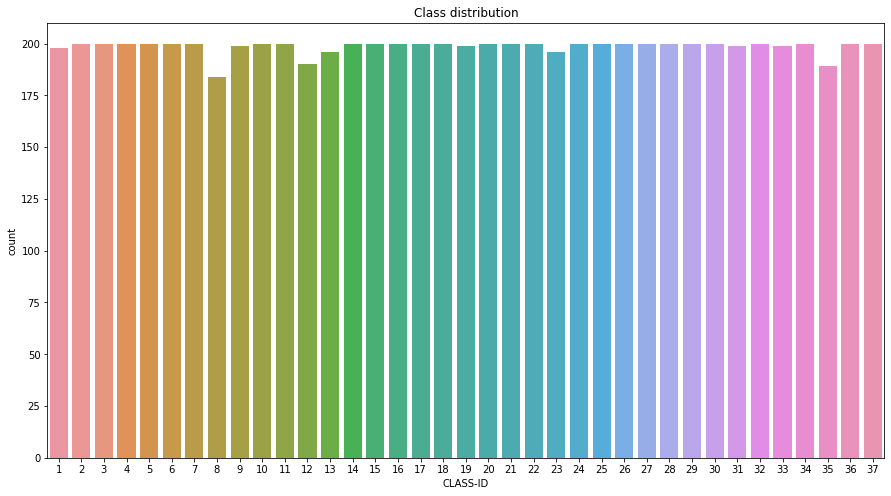

In [5]:
plt.figure(figsize=(15, 8))
sns.countplot(x='CLASS-ID', data=df).set_title('Class distribution')
plt.show()

In [6]:
df[['CLASS-NAME', 'CLASS-ID']].value_counts()

CLASS-NAME                  CLASS-ID
yorkshire_terrier           37          200
basset_hound                4           200
pug                         26          200
pomeranian                  25          200
miniature_pinscher          22          200
leonberger                  20          200
japanese_chin               18          200
havanese                    17          200
great_pyrenees              16          200
german_shorthaired          15          200
english_setter              14          200
Bengal                      6           200
chihuahua                   11          200
samoyed                     30          200
beagle                      5           200
american_pit_bull_terrier   3           200
american_bulldog            2           200
Sphynx                      34          200
Russian_Blue                28          200
Ragdoll                     27          200
Persian                     24          200
Maine_Coon                  21         

## Species distribution

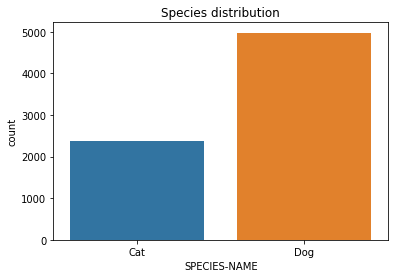

In [7]:
sns.countplot(x='SPECIES-NAME', data=df).set_title('Species distribution')
plt.show()

## Sample images for each class

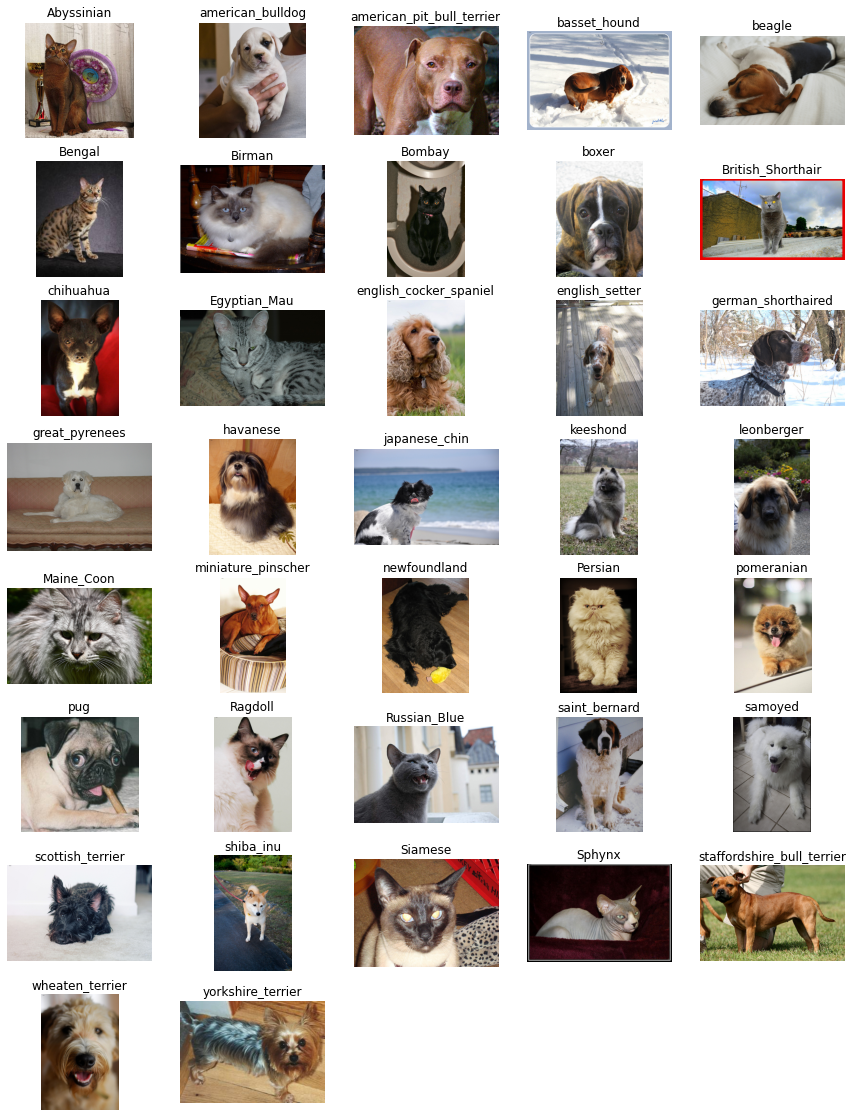

In [8]:
rows, cols = 8, 5
fig, axs = plt.subplots(rows, cols, figsize=(15, 20))
for i in range(rows):
    for j in range(cols):
        axs[i, j].axis('off')
        idx = cols * i + j
        if idx > 36:
            continue
        sample = df[df['CLASS-ID'] == idx + 1].sample()
        sample_name = np.array(sample['Image'])[0]
        class_name = np.array(sample['CLASS-NAME'])[0]
        image = cv.cvtColor(cv.imread(f'{data_path}/images/{sample_name}.jpg'),
                            cv.COLOR_BGR2RGB)
        axs[i, j].imshow(image)
        axs[i, j].set_title(class_name)

### with resized images

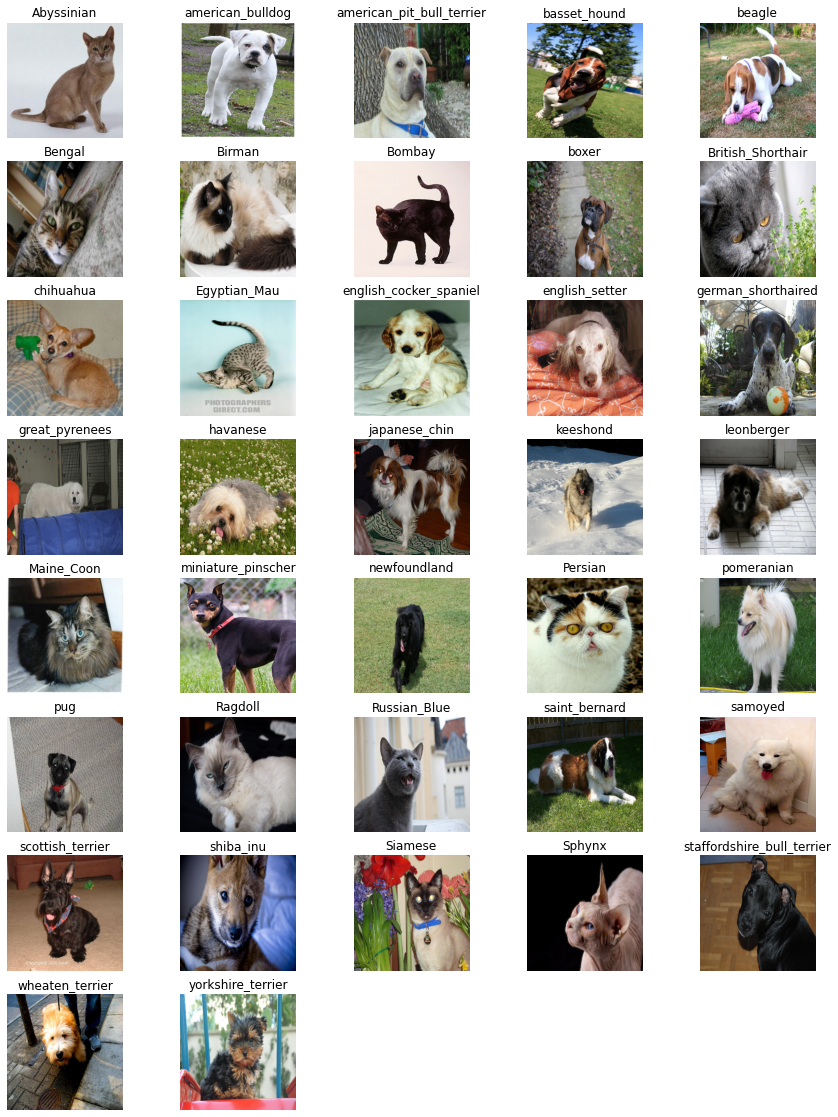

In [9]:
rows, cols = 8, 5
sz = 256
fig, axs = plt.subplots(rows, cols, figsize=(15, 20))
for i in range(rows):
    for j in range(cols):
        axs[i, j].axis('off')
        idx = cols * i + j
        if idx > 36:
            continue
        sample = df[df['CLASS-ID'] == idx + 1].sample()
        sample_name = np.array(sample['Image'])[0]
        class_name = np.array(sample['CLASS-NAME'])[0]
        image = cv.resize(
            cv.cvtColor(cv.imread(f'{data_path}/images/{sample_name}.jpg'),
                        cv.COLOR_BGR2RGB), (sz, sz))
        axs[i, j].imshow(image)
        axs[i, j].set_title(class_name)

## Sample images within the class

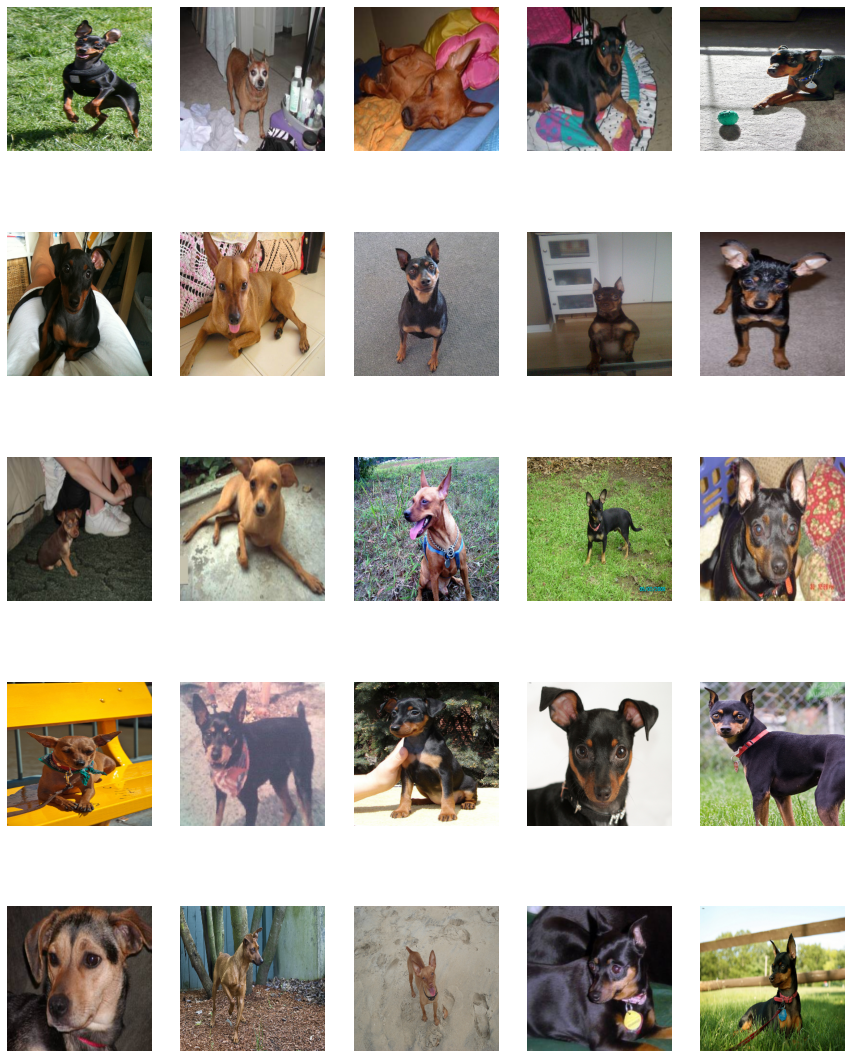

In [10]:
rows, cols = 5, 5
class_id = 22
sz = 256
fig, axs = plt.subplots(rows, cols, figsize=(15, 20))
samples = df[df['CLASS-ID'] == class_id].sample(rows * cols)
for idx, (_, row) in enumerate(samples.iterrows()):
    i, j = idx // rows, idx % rows
    axs[i, j].axis('off')
    sample_name = row['Image']
    image = cv.resize(
        cv.cvtColor(cv.imread(f'{data_path}/images/{sample_name}.jpg'),
                    cv.COLOR_BGR2RGB), (sz, sz))
    axs[i, j].imshow(image)